In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("/content/train_ds.csv")

In [3]:
data

,Unnamed: 0,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,diabetes,on_thyroxine,TSH,T3,TT4,T4U,FTI,thyroid
0,0,0,80.00,0,1,25.19,140,0,0,0.300000,1.970629,108.700305,0.976056,113.640746,0.0
1,1,0,54.00,0,0,27.32,80,0,0,1.600000,1.900000,128.000000,0.976056,113.640746,0.0
2,2,1,28.00,0,0,27.32,158,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0
3,3,0,36.00,0,0,23.45,155,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0
4,4,1,76.00,1,1,20.14,155,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29365,29365,0,77.00,0,0,31.86,140,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0
29366,29366,1,1.72,0,0,15.83,200,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0
29367,29367,1,80.00,0,0,31.30,300,1,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0
29368,29368,0,67.00,0,0,22.76,85,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.0


In [4]:
data.isnull().sum()

Unnamed: 0             0
gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
blood_glucose_level    0
diabetes               0
on_thyroxine           0
TSH                    0
T3                     0
TT4                    1
T4U                    1
FTI                    1
thyroid                1
dtype: int64

In [14]:
#y['TSH'].fillna((y['TSH'].mean()), inplace=True)
data['TT4'].fillna((data['TT4'].mean()), inplace=True)
data['thyroid'].fillna((data['thyroid'].mean()), inplace=True)
data['T4U'].fillna((data['T4U'].mean()), inplace=True)
data['FTI'].fillna((data['FTI'].mean()), inplace=True)

In [15]:
X = data.drop(['diabetes','Unnamed: 0'], axis=1)
X

,gender,age,hypertension,heart_disease,bmi,blood_glucose_level,on_thyroxine,TSH,T3,TT4,T4U,FTI,thyroid
0,0,80.00,0,1,25.19,140,0,0.300000,1.970629,108.700305,0.976056,113.640746,0.00000
1,0,54.00,0,0,27.32,80,0,1.600000,1.900000,128.000000,0.976056,113.640746,0.00000
2,1,28.00,0,0,27.32,158,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000
3,0,36.00,0,0,23.45,155,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000
4,1,76.00,1,1,20.14,155,0,5.218403,1.970629,108.700305,0.976056,113.640746,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29365,0,77.00,0,0,31.86,140,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000
29366,1,1.72,0,0,15.83,200,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000
29367,1,80.00,0,0,31.30,300,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000
29368,0,67.00,0,0,22.76,85,0,5.218403,1.970629,108.700305,0.976056,113.640746,0.00000


In [16]:
y = data['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
29365    0
29366    0
29367    1
29368    0
29369    0
Name: diabetes, Length: 29370, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Train Feedforward Neural Network
fnn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
fnn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [29]:
# Predict using FNN
y_pred_fnn = fnn.predict(X_test)

In [30]:
# Train XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8,
                    colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [31]:
# Predict using XGBoost
y_pred_xgb = xgb.predict(X_test)

In [34]:
# Ensemble Prediction
y_pred_combined = np.round((y_pred_fnn + y_pred_xgb) / 2).astype(int)

In [35]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_combined)
print("Accuracy of the hybrid model:", accuracy)

Accuracy of the hybrid model: 0.9506298944501191


In [36]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_combined)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5382
           1       0.97      0.42      0.59       492

    accuracy                           0.95      5874
   macro avg       0.96      0.71      0.78      5874
weighted avg       0.95      0.95      0.94      5874



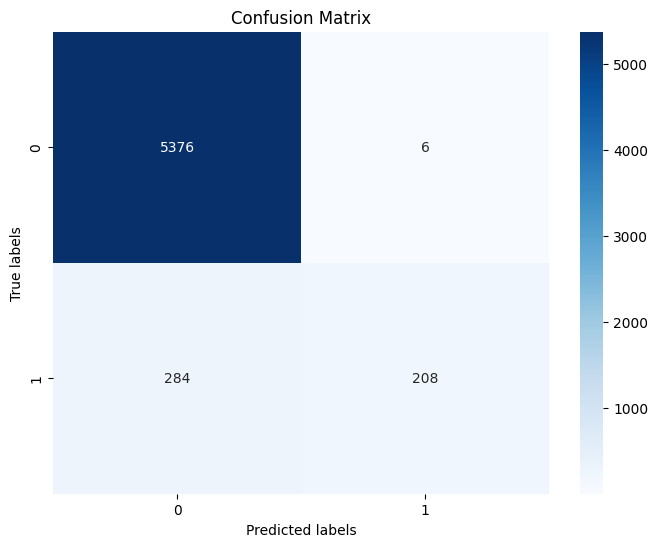

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


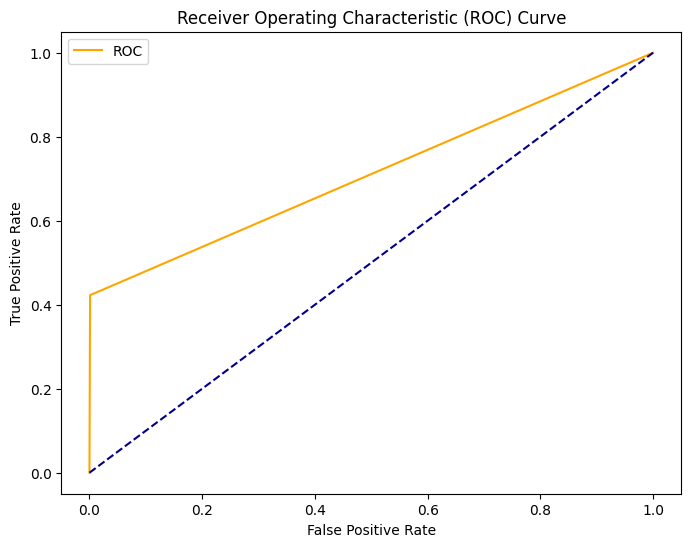

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_combined)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

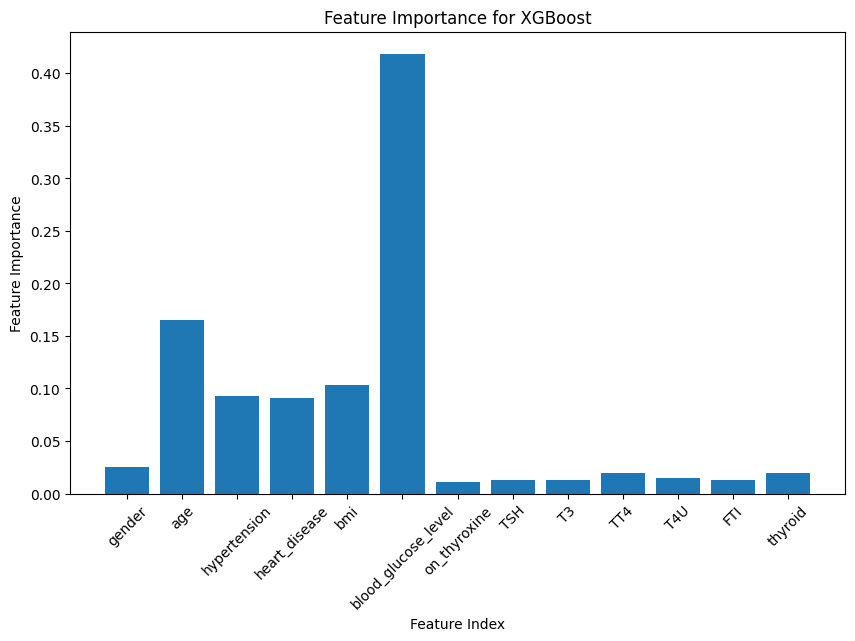

In [41]:
# Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance for XGBoost")
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.show()